In [20]:
def inverse_standardize(data, means, stds):
    """
    对标准化数据进行反标准化。

    参数：
    data: np.ndarray - 标准化后的数据。
    means: np.ndarray - 每个通道的均值。
    stds: np.ndarray - 每个通道的标准差。

    返回：
    original_data: np.ndarray - 反标准化后的数据。
    """
    original_data = data * stds + means
    return original_data


In [22]:
def standardize(data):
    """
    按通道标准化多通道数据，返回标准化后的数据、均值和标准差。

    参数：
    data: np.ndarray - 输入数据，形状为 (样本数, 通道数)。

    返回：
    standardized_data: np.ndarray - 标准化后的数据。
    means: np.ndarray - 每个通道的均值。
    stds: np.ndarray - 每个通道的标准差。
    """
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)

    standardized_data = (data - means) / stds
    return standardized_data, means, stds


In [23]:
import pandas as pd
import numpy as np

ori_data = pd.read_csv('E:/Dataset/waves/dataset1.csv')
mwh_data = ori_data['MWH']
_,mean,std=standardize(mwh_data)
pre_data=np.load('data/predictions_final.npy')
predictions_final_inverse=inverse_standardize(pre_data,mean,std)

In [31]:
from Ablation.model import ModelEvaluator
#源数据的数据评测
evaluator = ModelEvaluator(predictions_final_inverse, mwh_data)
print(f"Root Mean Squared Error (RMSE): {evaluator.rmse()}")
print(f"Mean Absolute Error (MAE): {evaluator.mae()}")
print(f"Sum of Squared Errors (SSE): {evaluator.sse()}")
print(f"Mean Absolute Percentage Error (MAPE): {evaluator.mape()}")
print(f"Theil's Inequality Coefficient (TIC): {evaluator.tic()}")
mwh_data.shape

Root Mean Squared Error (RMSE): 3.2914547937528624
Mean Absolute Error (MAE): 2.4238005399599296
Sum of Squared Errors (SSE): 3900122.8773547313
Mean Absolute Percentage Error (MAPE): 848.5762448278927
Theil's Inequality Coefficient (TIC): 19.82887038650754


(600,)

In [72]:
mean = np.load('../data/dt1/mean.npy')
std = np.load('../data/dt1/std.npy')
pre_data_1=np.load('data/predictions.npy')

In [73]:
# 对每个通道（mode）进行反标准化
# mean[i] 和 std[i] 分别为每个 mode 的均值和标准差
predictions_inverse = np.zeros_like(pre_data_1)  # 创建一个与 pre_data_1 形状相同的数组
for i in range(pre_data_1.shape[1]):
    predictions_inverse[:, i] = inverse_standardize(pre_data_1[:, i], mean[i], std[i])

# 保存反标准化后的数据
np.save('data/predictions_inverse.npy', predictions_inverse)
print("反标准化后的数据已保存为 'data/predictions_inverse.npy'")

反标准化后的数据已保存为 'data/predictions_inverse.npy'


In [74]:
from Ablation.model import AnticipationModule
def anticipate_mode_ori(data_path):
    predication = np.load(data_path)
    anticipation_module = AnticipationModule()
    prediction_data = anticipation_module(predication)
    return prediction_data
anticipate_data = anticipate_mode_ori('data/predictions_inverse.npy')
print(anticipate_data.shape)
np.save('data/predictions_inverse_final', anticipate_data)

(600, 1)


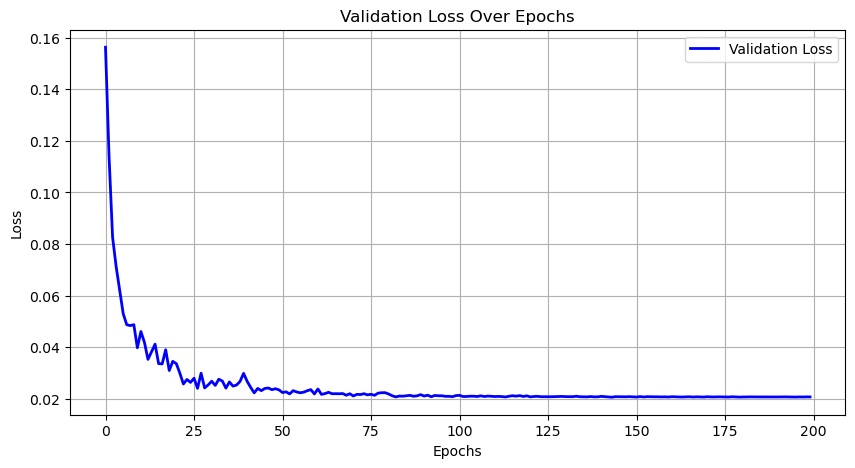

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# 加载验证损失数据
val_loss = np.load('./data/loss/val_loss_list_2.npy')

# 绘制验证损失图
plt.figure(figsize=(10, 5))
plt.plot(val_loss, label='Validation Loss', color='blue', linewidth=2)
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()


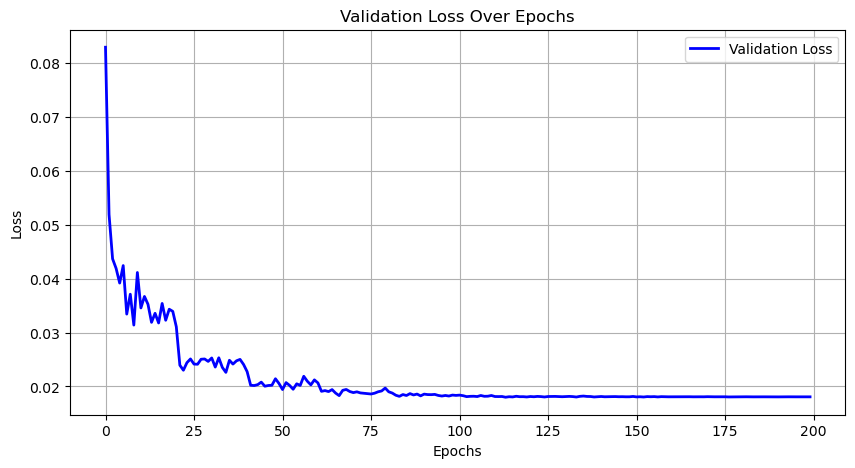

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# 加载验证损失数据
val_loss = np.load('./data/loss/proposed/val_loss_list.npy')

# 绘制验证损失图
plt.figure(figsize=(10, 5))
plt.plot(val_loss, label='Validation Loss', color='blue', linewidth=2)
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

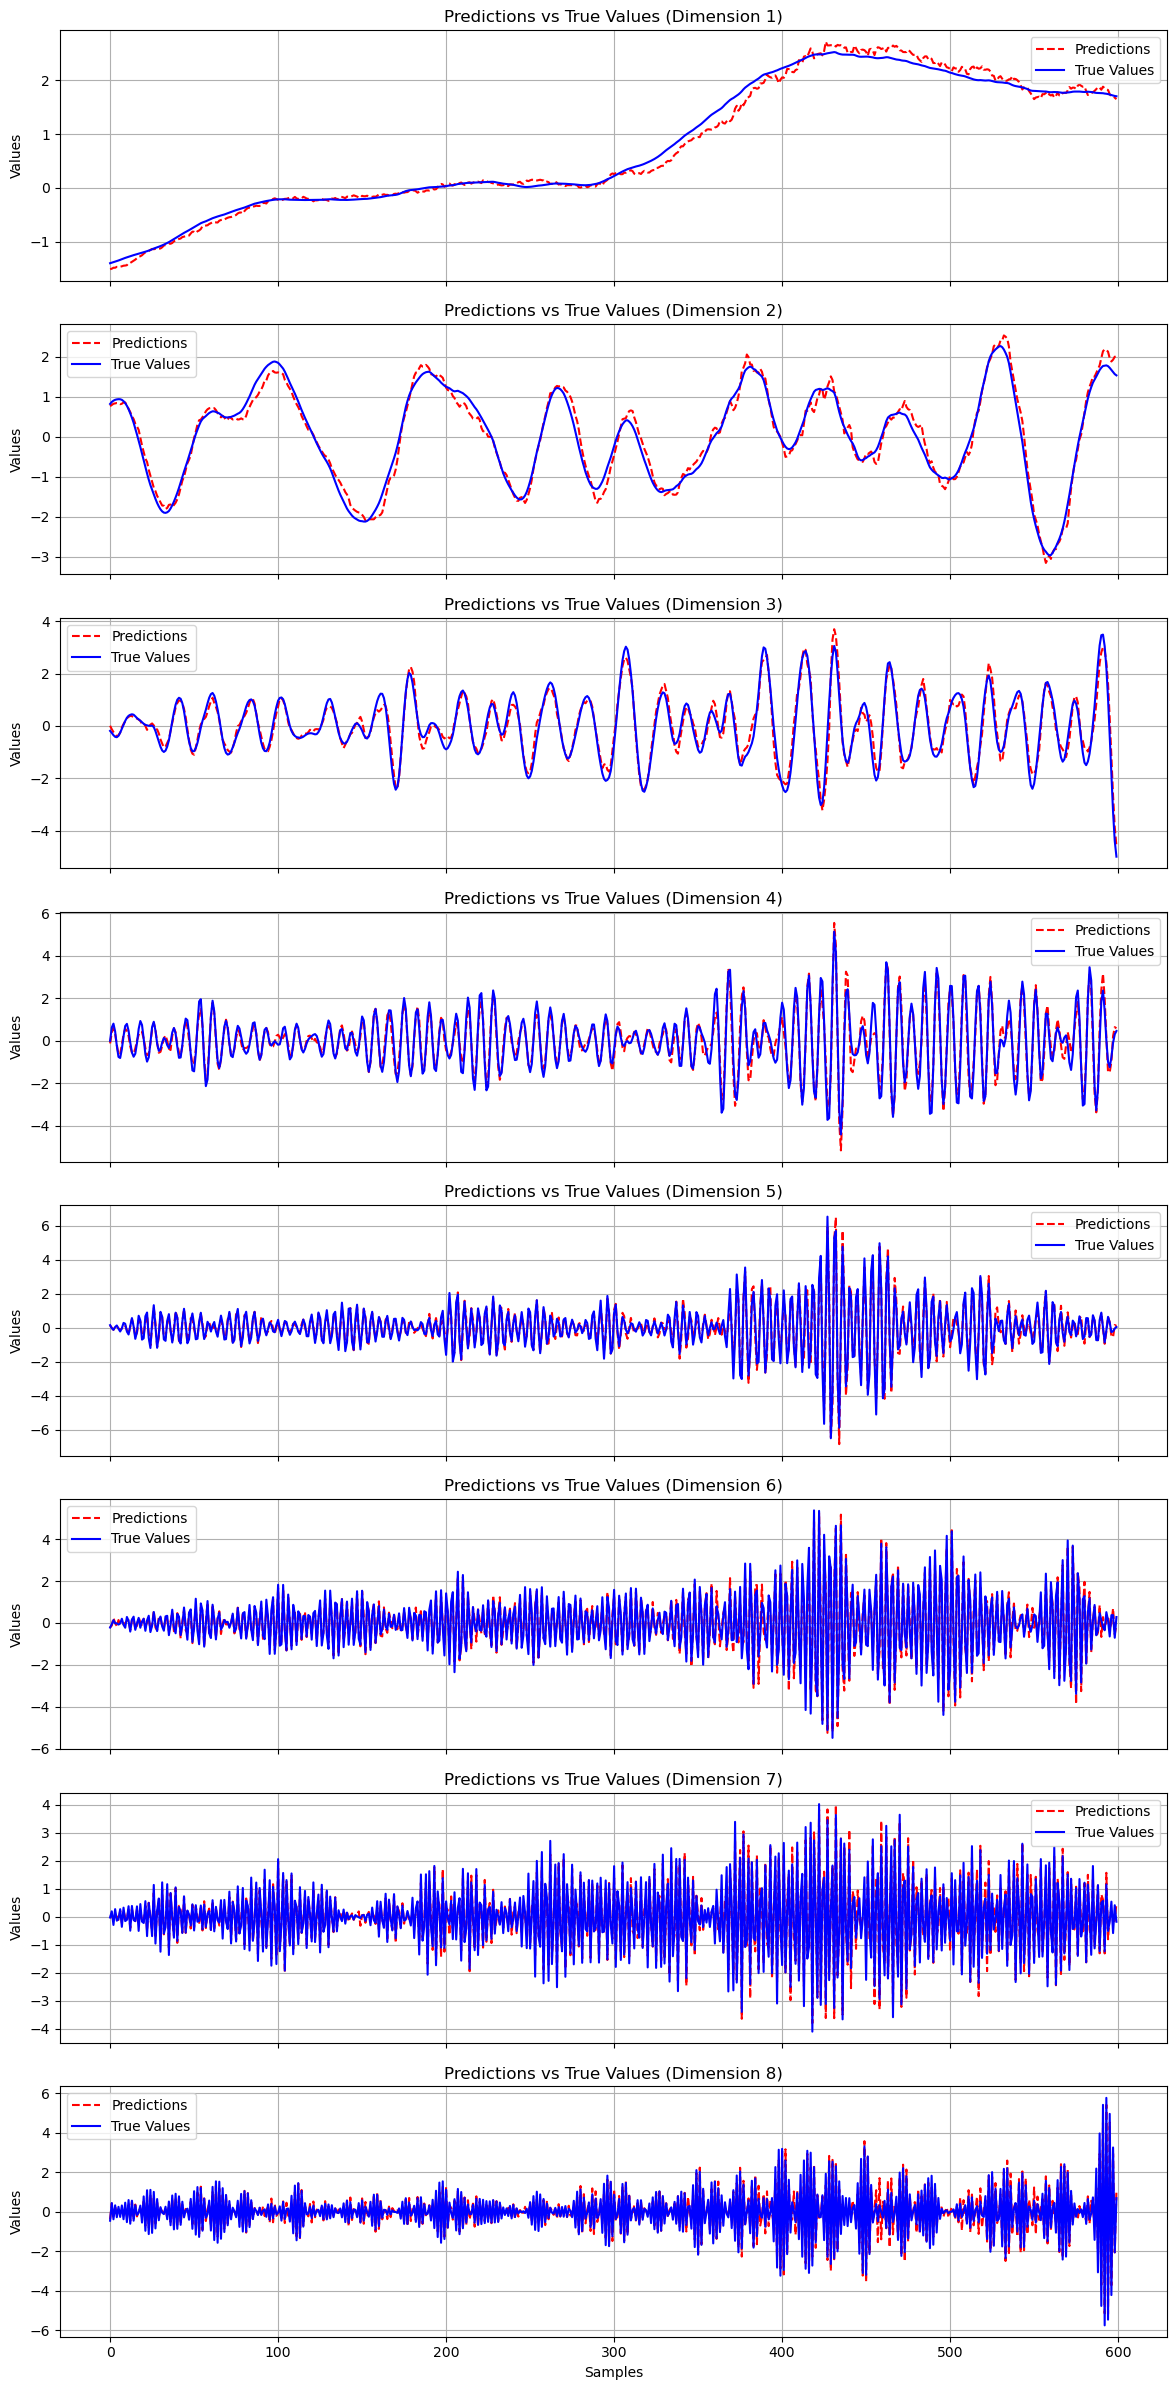

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# 加载预测值和真实值
predictions = np.load('./data/predictions.npy')  # 修改为实际路径
targets = np.load('./data/targets.npy')          # 修改为实际路径

# 设置子图的行数和列数
n_dimensions = predictions.shape[1]  # 获取维度数量
fig, axes = plt.subplots(n_dimensions, 1, figsize=(12, 3 * n_dimensions), sharex=True)

# 遍历每个维度，绘制对应的预测值和真实值
for i in range(n_dimensions):
    predictions_all = predictions[:, i]  # 获取第i个维度的所有预测值
    targets_all = targets[:, i]            # 获取第i个维度的所有真实值
    
    # 绘制预测值和真实值
    axes[i].plot(predictions_all, label='Predictions', color='red', linestyle='--')
    axes[i].plot(targets_all, label='True Values', color='blue')
    axes[i].set_title(f'Predictions vs True Values (Dimension {i+1})')
    axes[i].set_ylabel('Values')
    axes[i].legend()
    axes[i].grid()

# 设置 x 轴标签
axes[-1].set_xlabel('Samples')

plt.tight_layout()  # 调整子图布局
plt.show()



In [47]:
import numpy as np
def extract_label():
    file_path = 'E:/Dataset/waves/'
    file_path_ori = file_path + 'dataset1.csv'
    data = pd.read_csv(file_path_ori)
    # 忽略 'Date/Time' 列
    if 'Date/Time' in data.columns:
        data = data.drop(columns=['Date/Time'])
    mwh_data = data['MWH'].values[-600:]  # 提取最后 600 行的 MWH 列
    mwh_data=mwh_data.reshape(-1, 1) 
    return mwh_data

In [48]:
original_data = extract_label()
original_data.shape

(600, 1)

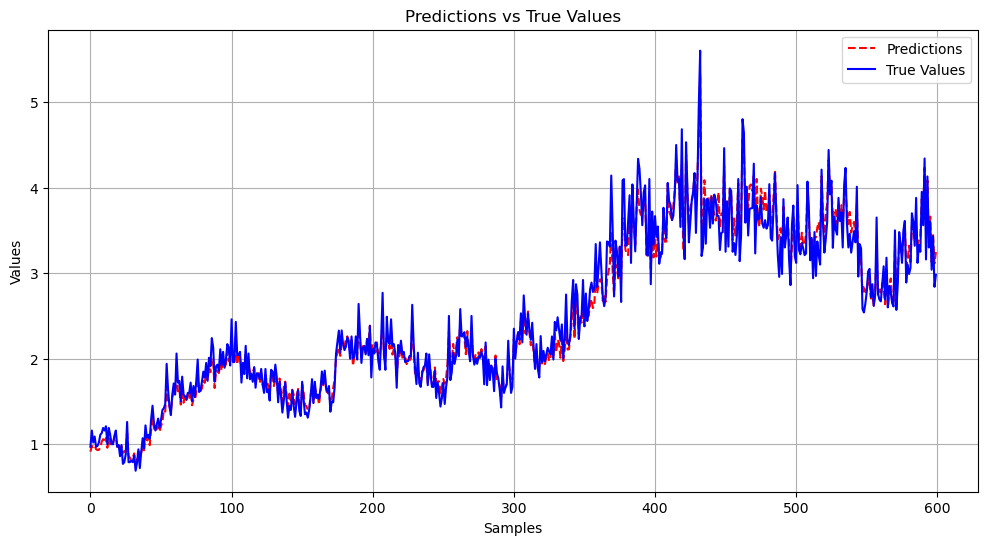

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 加载预测值和真实值
predictions = np.load('./data/predictions_inverse_final.npy')  # 修改为实际路径
predicted_original_data = np.load('../data/dt1/pre_original_data.npy')
# 获取所有数据的第一个维度
predictions_all = predictions[:]  # 获取所有预测值的第一个维度

# 绘制图像
plt.figure(figsize=(12, 6))
plt.plot(predictions_all, label='Predictions', color='red', linestyle='--')
plt.plot(original_data, label='True Values', color='blue')
# plt.plot(predicted_original_data, label='Predictions Values', color='red')
plt.title('Predictions vs True Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


In [75]:
from Ablation.model import ModelEvaluator

#源数据的数据评测
predictions_inverse_final=np.load('data/predictions_inverse_final.npy')
evaluator = ModelEvaluator(predictions_inverse_final, original_data)
print(f"Root Mean Squared Error (RMSE): {evaluator.rmse()}")
print(f"Mean Absolute Error (MAE): {evaluator.mae()}")
print(f"Sum of Squared Errors (SSE): {evaluator.sse()}")
print(f"Mean Absolute Percentage Error (MAPE): {evaluator.mape()}")
print(f"Theil's Inequality Coefficient (TIC): {evaluator.tic()}")

Root Mean Squared Error (RMSE): 0.1605517650480746
Mean Absolute Error (MAE): 0.12247820953289666
Sum of Squared Errors (SSE): 15.46612155603129
Mean Absolute Percentage Error (MAPE): 4.924649817813188
Theil's Inequality Coefficient (TIC): 0.06051628509177134


In [62]:
# 对每个通道（mode）进行反标准化
# mean[i] 和 std[i] 分别为每个 mode 的均值和标准差
predictions_data_multi=np.load('./data/MultiOutput/predictions.npy')
predictions_inverse = np.zeros_like(predictions_data_multi)  # 创建一个与 pre_data_1 形状相同的数组
for i in range(predictions_data_multi.shape[1]):
    predictions_inverse[:, i] = inverse_standardize(pre_data_1[:, i], mean[i], std[i])

# 保存反标准化后的数据
np.save('data/MultiOutput/predictions_inverse.npy', predictions_inverse)
print("反标准化后的数据已保存为 'data/predictions_inverse.npy'")

反标准化后的数据已保存为 'data/predictions_inverse.npy'


In [63]:
anticipate_data = anticipate_mode_ori('data/MultiOutput/predictions_inverse.npy')
print(anticipate_data.shape)
np.save('data/MultiOutput/predictions_inverse_final', anticipate_data)

(600, 1)


In [71]:
#源数据的数据评测
predictions_inverse_final_multi=np.load('data/MultiOutput/predictions_inverse_final.npy')
evaluator = ModelEvaluator(predictions_inverse_final_multi, predictions_inverse_final)
print(f"Root Mean Squared Error (RMSE): {evaluator.rmse()}")
print(f"Mean Absolute Error (MAE): {evaluator.mae()}")
print(f"Sum of Squared Errors (SSE): {evaluator.sse()}")
print(f"Mean Absolute Percentage Error (MAPE): {evaluator.mape()}")
print(f"Theil's Inequality Coefficient (TIC): {evaluator.tic()}")

Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
Sum of Squared Errors (SSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
Theil's Inequality Coefficient (TIC): 0.0


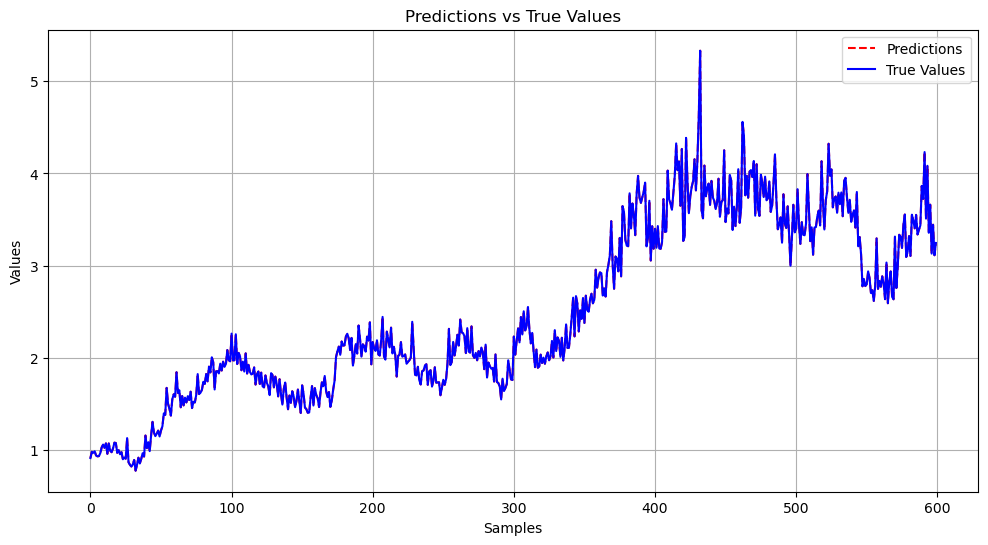

In [70]:
# 绘制图像
plt.figure(figsize=(12, 6))
plt.plot(predictions_inverse_final_multi, label='Predictions', color='red', linestyle='--')
plt.plot(predictions_inverse_final, label='True Values', color='blue')
# plt.plot(predicted_original_data, label='Predictions Values', color='red')
plt.title('Predictions vs True Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()